<div class="alert alert-info" style="background-color:#f07914; color:white; padding:0px 10px; border-radius:5px; text-align: center;font-weight:600;font-family:Helvectica"><h2 style='margin:10px 5px 10px'>Car Price Prediction</h2>
</div>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Load the Data</h2>
</div>

In [3]:
#Importing Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Overview of the Data</h2>
</div>

In [5]:
#Reading Data using Pandas
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\train.csv')
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
#Replacing all random values with null
missing_values = ["n/a", "na", "--","-"]
price_df = pd.read_csv(r'C:\Users\Owner\Downloads\CarPricePrediction\train.csv', na_values = missing_values)
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>

In [7]:
#Analysis of Columns and Datatypes and Null Count
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
#Understanding the columns
price_df.dtypes.value_counts()

object     12
int64       4
float64     2
dtype: int64

<h4><p style="color:#0d45be">There are a total of 18 columns where 12 are categorical and 6 are numerical.</p></h4>

In [503]:
#Changing the categorical to numerical columns
price_df['Mileage'] = price_df['Mileage'].str.replace('km', '')
price_df['Engine volume'] = price_df['Engine volume'].str.replace('Turbo', '')
price_df = price_df.astype({"Mileage": 'int64',"Engine volume":"float64"})
price_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [504]:
#Understanding the correlation of Numerical Columns
price_df.corr()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
ID,1.000000,-0.000844,-0.020628,0.071352,-0.012232,0.004157,-0.039319,-0.020527
Price,-0.000844,1.000000,0.063291,0.012982,0.008753,-0.001758,0.007518,-0.012824
Levy,-0.020628,0.063291,1.000000,-0.237967,0.648215,0.023624,0.588695,0.081107
Prod. year,0.071352,0.012982,-0.237967,1.000000,-0.030906,-0.063501,-0.096797,0.236969
Engine volume,-0.012232,0.008753,0.648215,-0.030906,1.000000,-0.006289,0.778524,0.224441
Mileage,0.004157,-0.001758,0.023624,-0.063501,-0.006289,1.000000,-0.001768,-0.009201
Cylinders,-0.039319,0.007518,0.588695,-0.096797,0.778524,-0.001768,1.000000,0.176868
Airbags,-0.020527,-0.012824,0.081107,0.236969,0.224441,-0.009201,0.176868,1.000000


<h4><p style="color:#0d45be">There is positive correlation between Levy-Price,ProdYear-Price and Airbags-Price.</p></h4>

In [505]:
#Summary of data to get an overview of basic statistics
price_df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


<h4><p style="color:#0d45be">The standard deviation of Levy is quite high as compared to other variables.</p></h4>

#### Numerical Variable Analysis 

In [506]:
#Analysis of Numerical Columns
num_df = price_df.select_dtypes(exclude = 'object').copy()
num_df.head()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,45654403,13328,1399.0,2010,3.5,186005,6.0,12
1,44731507,16621,1018.0,2011,3.0,192000,6.0,8
2,45774419,8467,NaN,2006,1.3,200000,4.0,2
3,45769185,3607,862.0,2011,2.5,168966,4.0,0
4,45809263,11726,446.0,2014,1.3,91901,4.0,4


In [507]:
for i in num_df.columns:
    print("Column: ",i," Len: ",len(num_df[i].unique()))

Column:  ID  Len:  18924
Column:  Price  Len:  2315
Column:  Levy  Len:  559
Column:  Prod. year  Len:  54
Column:  Engine volume  Len:  65
Column:  Mileage  Len:  7687
Column:  Cylinders  Len:  13
Column:  Airbags  Len:  17


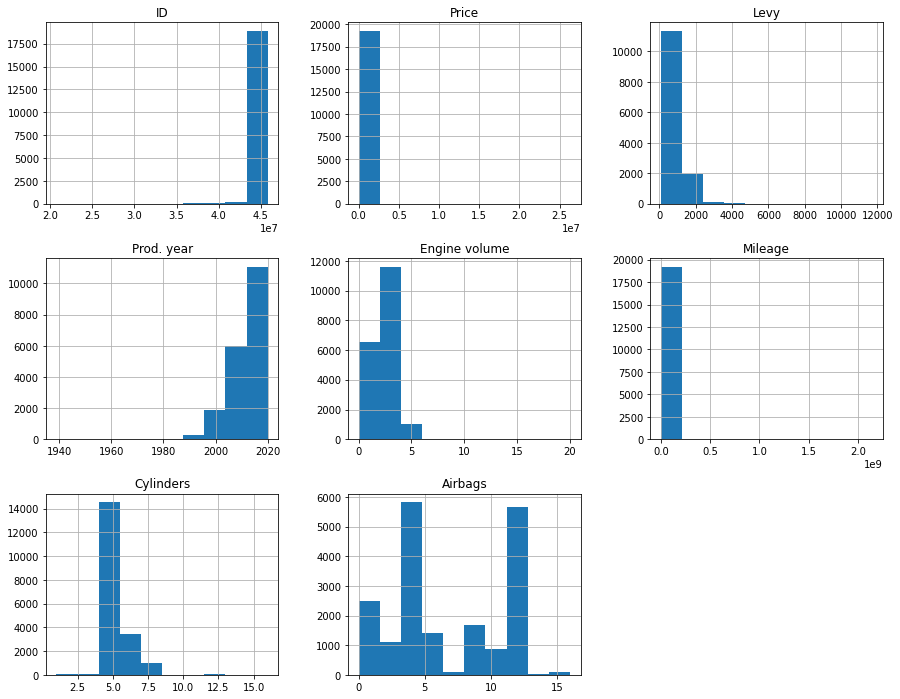

In [508]:
price_df.hist(figsize=(15,12),bins = 10)
plt.title("Features Distribution")
plt.show()

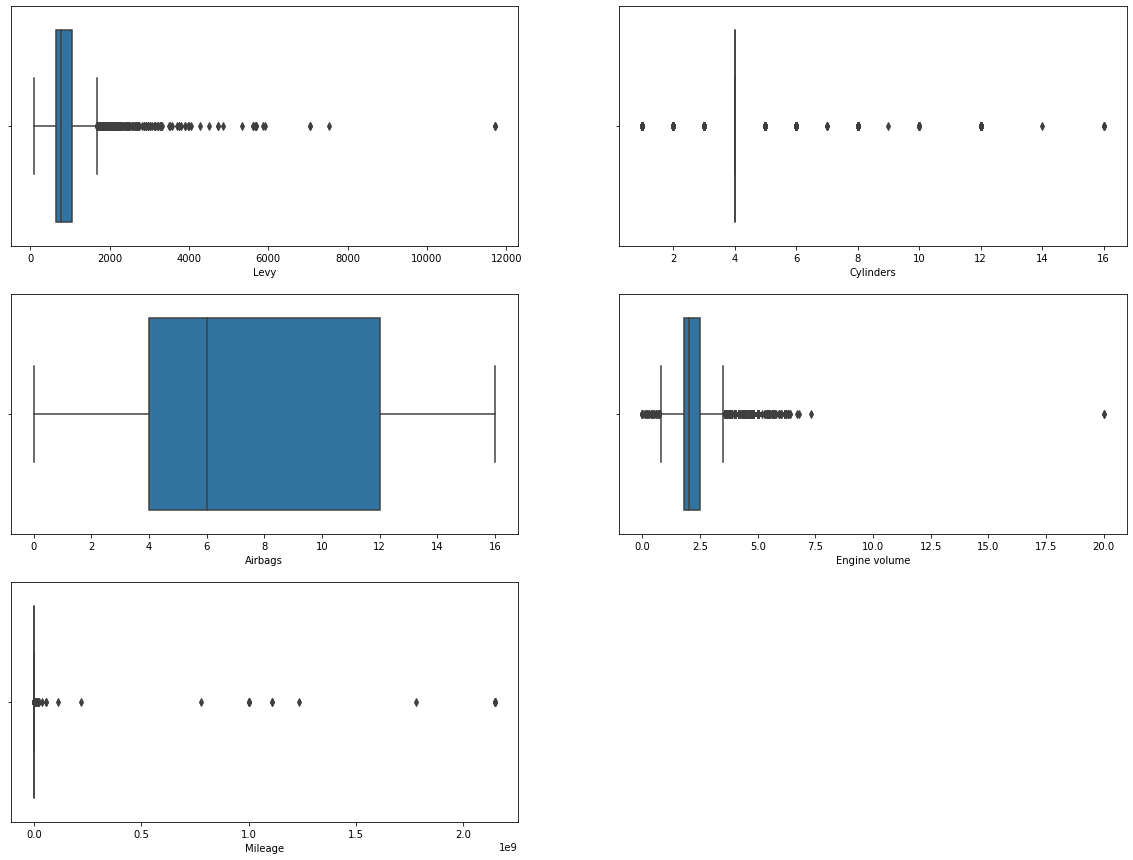

In [509]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.boxplot(x="Levy", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,2) 
sns.boxplot(x="Cylinders", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,3) 
sns.boxplot(x="Airbags", data=price_df,ax = ax1)

ax1 = fig.add_subplot(3,2,4) 
sns.boxplot(x="Engine volume",data=price_df,ax=ax1)

ax1 = fig.add_subplot(3,2,5) 
sns.boxplot(x="Mileage", data=price_df,ax = ax1)
plt.show()

<h4><p style="color:#0d45be">Levy, Mileage and Engine Volume shows skewness and there outliers observed too.</p></h4>

In [510]:
print(price_df['Levy'].skew())
print(price_df['Mileage'].skew())
print(price_df['Engine volume'].skew())

5.449954090897364
38.89682127467135
2.1862419140120277


#### Categorical Variable Analysis 

In [511]:
#Analysis of Categorical Columns
cat_df = price_df.select_dtypes(include = 'object').copy()
cat_df.head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver


In [512]:
for i in cat_df.columns:
    print("Column: ",i," Len: ",len(cat_df[i].unique()))

Column:  Manufacturer  Len:  65
Column:  Model  Len:  1590
Column:  Category  Len:  11
Column:  Leather interior  Len:  2
Column:  Fuel type  Len:  7
Column:  Gear box type  Len:  4
Column:  Drive wheels  Len:  3
Column:  Doors  Len:  3
Column:  Wheel  Len:  2
Column:  Color  Len:  16


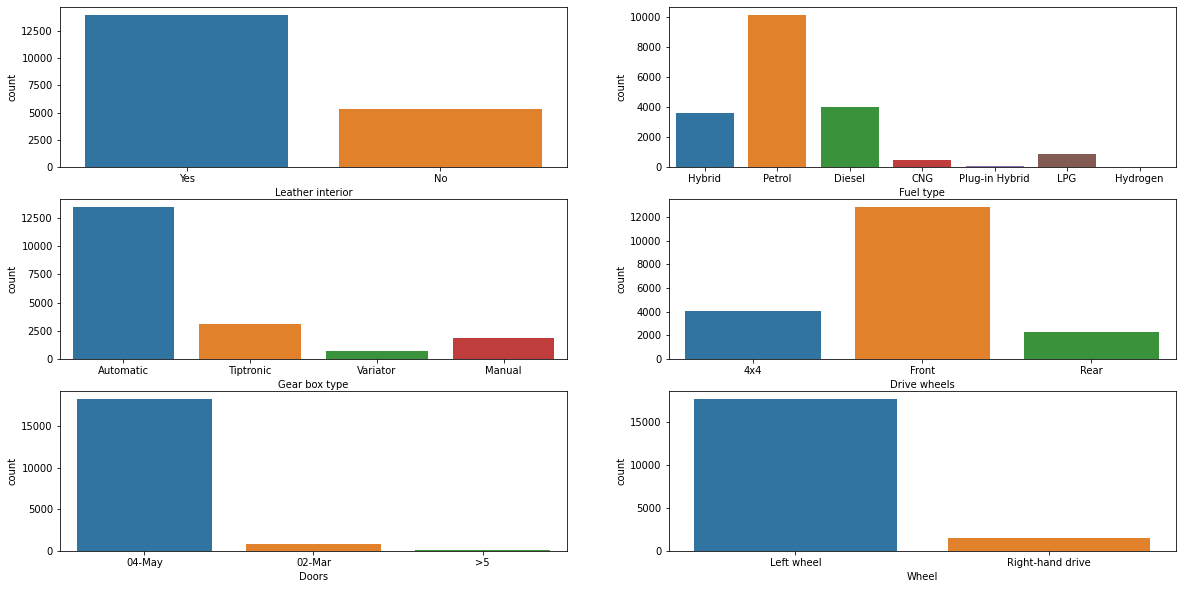

In [513]:
fig = plt.figure(figsize=(20,10))
counter = 1
for i in cat_df.columns:
    if len(cat_df[i].unique()) < 10:
        ax1 = fig.add_subplot(3,2,counter) 
        sns.countplot(data = price_df, x = i)
        if counter == 6:
            plt.show()
            counter = 1
        else:
            counter = counter+1
plt.show()

<h4><p style="color:#0d45be">Most of cars are with leather interiors and fuel type is petrol. There are more number of automatic cars with front and left-hand drive wheels.</p><p style="color:#0d45be">There is some oddity/random values seen in doors column.</p></h4>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preparation</h2>
</div>

#### Removing Skewness

In [515]:
print(price_df['Levy'].quantile(0.10))
print(price_df['Levy'].quantile(0.90))
print("---")

price_df["Levy"] = np.where(price_df["Levy"] <521.0, 521.0,price_df['Levy'])
price_df["Levy"] = np.where(price_df["Levy"] >1399.0, 1399.0,price_df['Levy'])
print(price_df['Levy'].skew())

521.0
1399.0
---
0.5938232625878801


In [516]:
print(price_df['Mileage'].quantile(0.10))
print(price_df['Mileage'].quantile(0.90))

print("---")

price_df["Mileage"] = np.where(price_df["Mileage"] <25061.40, 25061.40,price_df['Mileage'])
price_df["Mileage"] = np.where(price_df["Mileage"] >265210.0, 265210.0,price_df['Mileage'])
print(price_df['Mileage'].skew())

25061.400000000005
265210.0
---
0.2791510602246839


#### Plotting Columns after removal of Skewness

<AxesSubplot:xlabel='Mileage'>

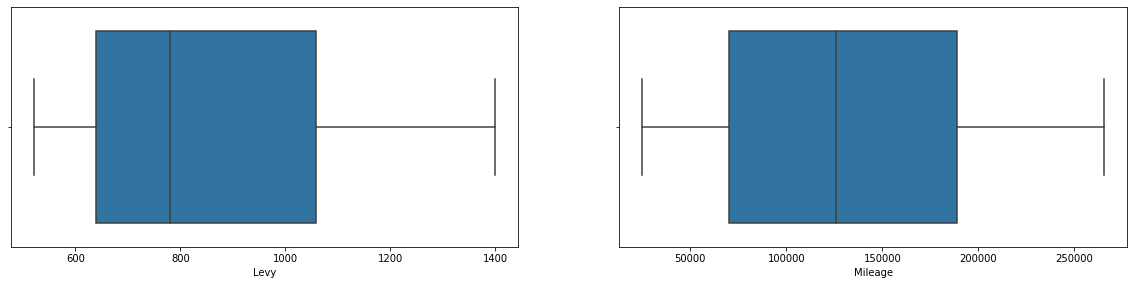

In [517]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.boxplot(x="Levy", data=price_df,ax = ax1)
ax1 = fig.add_subplot(3,2,2) 
sns.boxplot(x="Mileage", data=price_df,ax = ax1)

#### Label Encoding of Categorical Data

In [518]:
for i in cat_df.columns:
    price_df[i+"_transform"] = LabelEncoder().fit_transform(price_df[i])
price_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Manufacturer_transform,Model_transform,Category_transform,Leather interior_transform,Fuel type_transform,Gear box type_transform,Drive wheels_transform,Doors_transform,Wheel_transform,Color_transform
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,32,1242,4,1,2,0,0,1,0,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,8,658,4,0,5,2,0,1,0,1
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,21,684,3,0,5,3,1,1,1,1
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,16,661,4,1,2,0,0,1,0,14
4,45809263,11726,521.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,21,684,3,1,5,0,1,1,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,...,36,385,1,1,0,1,2,0,0,12
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,...,23,1334,9,1,5,2,1,1,0,11
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,...,23,1442,4,1,1,0,1,1,0,7
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,...,8,456,4,1,1,0,1,1,0,1


In [519]:
#Dropping all Categorical Columns after Label Encoding
price_df.drop(cat_df.columns, axis = 1,inplace=True)

#Dropping the doors column as it presuming it contains wrong data
price_df.drop(['Doors_transform'], axis = 1,inplace=True)
price_df.head()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer_transform,Model_transform,Category_transform,Leather interior_transform,Fuel type_transform,Gear box type_transform,Drive wheels_transform,Wheel_transform,Color_transform
0,45654403,13328,1399.0,2010,3.5,186005.0,6.0,12,32,1242,4,1,2,0,0,0,12
1,44731507,16621,1018.0,2011,3.0,192000.0,6.0,8,8,658,4,0,5,2,0,0,1
2,45774419,8467,NaN,2006,1.3,200000.0,4.0,2,21,684,3,0,5,3,1,1,1
3,45769185,3607,862.0,2011,2.5,168966.0,4.0,0,16,661,4,1,2,0,0,0,14
4,45809263,11726,521.0,2014,1.3,91901.0,4.0,4,21,684,3,1,5,0,1,0,12


#### Removing duplicates and Null Values.

In [497]:
#Checking for duplicates
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records with duplicated: ",len(price_df))

price_df = price_df.drop_duplicates()
duplicate = price_df[price_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))
print("Total number of records after dropping duplicates: ",len(data))

Total number of duplicated:  313
Total number of records with duplicated:  19237
Total number of duplicated:  0
Total number of records after dropping duplicates:  18924


In [498]:
#Checking for null/nan values
for i in range(data.shape[1]):
# count number of rows with missing values
    n_miss = data.iloc[:, i].isnull().sum().sum()
    perc = n_miss / len(data) * 100
    if(n_miss>0):
        print('Columns: %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

Columns: 2, Missing: 5709 (30.2%)


#### Missing Value Imputation

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Improving Model</h2>
</div>

<div class="alert alert-info" style="background-color:#00a6b8; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Conclusion</h2>
</div>